# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, mean_squared_error, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from pipetorch import DFrame
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from scipy import stats
from seaborn import load_dataset, pairplot
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pipetorch.evaluate.study import Study, optuna

# uiteindelijk simulatie inladen

In [10]:
sim_groot= pd.read_csv('Uiteindelijk dataset food Heel Groot.csv')
sim= sim_groot.sample(frac=1).reset_index(drop=True)
sim

,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
69996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
69998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
X = sim.drop(sim.columns[-1], axis = 1).values
y = sim[sim.columns[-1]].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2)

Dit is een classificatie probleem. Daardoor zijn de volgende machine learning modellen toegepast: Logistic Regression, KNeighbors Classifier, RandomForest Classifier, Decision Tree en Support Vector Classifier.

# Logistic Regression

parameter class_weight gebruikt om de data te balanceren

[[3434 3561]
 [3364 3641]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      6995
           1       0.51      0.52      0.51      7005

    accuracy                           0.51     14000
   macro avg       0.51      0.51      0.51     14000
weighted avg       0.51      0.51      0.51     14000

accuracy: 0.5053571428571428
precision: 0.5055540127742294
recall: 0.5197715917201998


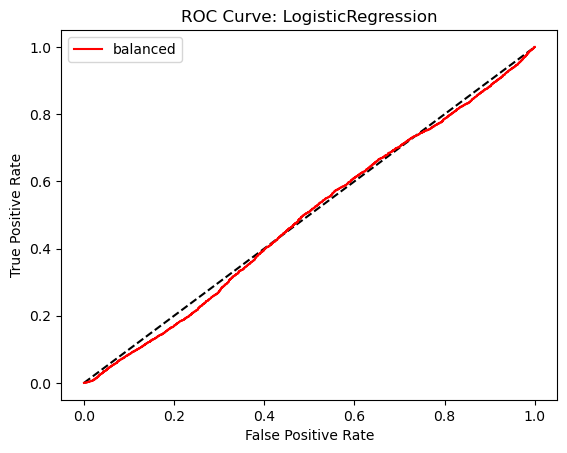

In [12]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
pred_y= logreg.predict(X_test)
pred_y_prob = logreg.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr_logreg1, tpr_logreg1, thresholds = roc_curve(y_test, pred_y_prob)
auc_score_logreg1 = roc_auc_score(y_test, pred_y_prob)

print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg1, tpr_logreg1, color = 'red', label = 'balanced')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: LogisticRegression')
plt.legend()
plt.show()

# KNeighbors Classifier

0.7999285714285714
[[5415 1580]
 [1221 5784]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      6995
           1       0.79      0.83      0.81      7005

    accuracy                           0.80     14000
   macro avg       0.80      0.80      0.80     14000
weighted avg       0.80      0.80      0.80     14000

accuracy: 0.7999285714285714
precision: 0.7854426941879413
recall: 0.8256959314775161


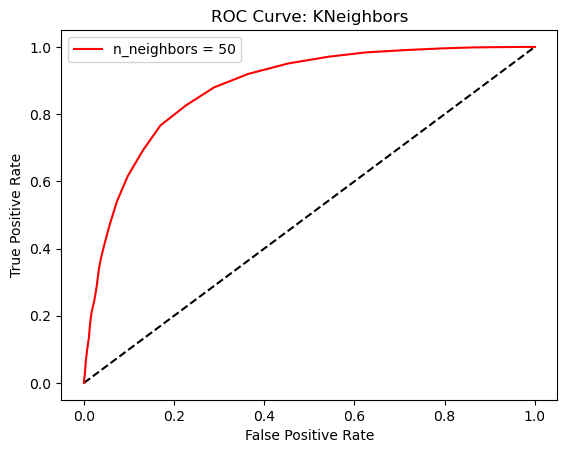

In [13]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
pred_y = knn.predict(X_test)
pred_y_prob = knn.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr_knn1, tpr_knn1, thresholds = roc_curve(y_test, pred_y_prob)
auc_score_knn1 = roc_auc_score(y_test, pred_y_prob)

print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn1, tpr_knn1, color = 'red', label='n_neighbors = 50')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: KNeighbors')
plt.legend()
plt.show()

# RandomForestClassifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[5763 1232]
 [ 434 6571]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      6995
           1       0.84      0.94      0.89      7005

    accuracy                           0.88     14000
   macro avg       0.89      0.88      0.88     14000
weighted avg       0.89      0.88      0.88     14000

accuracy: 0.881
precision: 0.8421120082019736
recall: 0.9380442541042113


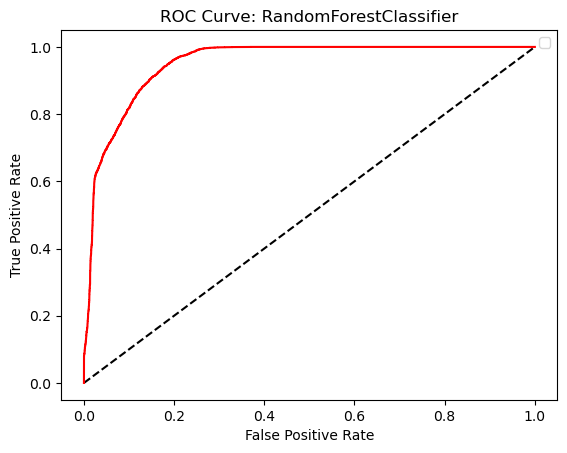

In [14]:
rfc= RandomForestClassifier(max_depth=22, n_estimators=180,
                       random_state=42)
rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)
pred_y_prob = rfc.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr_rfc1, tpr_rfc1, thresholds = roc_curve(y_test, pred_y_prob)
auc_score_rfc1 = roc_auc_score(y_test, pred_y_prob)

print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc1, tpr_rfc1, color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: RandomForestClassifier')
plt.legend()
plt.show()

# DecisionTree

[[5947 1048]
 [ 892 6113]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6995
           1       0.85      0.87      0.86      7005

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000

accuracy: 0.8614285714285714
precision: 0.8536517246194666
recall: 0.8726623840114204


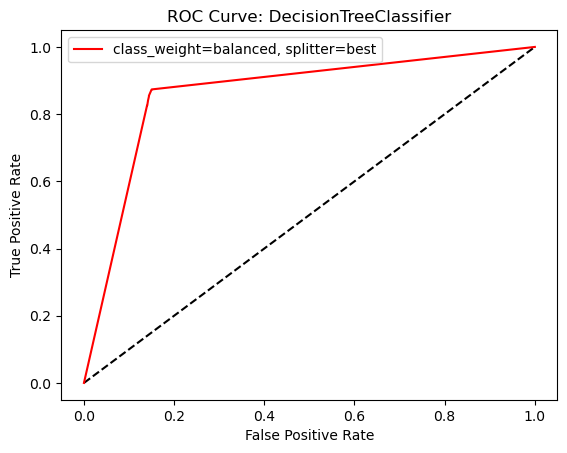

In [15]:
clf = DecisionTreeClassifier(class_weight='balanced', splitter='best')
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
pred_y_prob = clf.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr_clf1, tpr_clf1, thresholds = roc_curve(y_test, pred_y_prob)
auc_score_clf1 = roc_auc_score(y_test, pred_y_prob)

print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_clf1, tpr_clf1, color = 'red', label='class_weight=balanced, splitter=best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: DecisionTreeClassifier')
plt.legend()
plt.show()

# Support Vector Classifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[5785 1210]
 [ 459 6546]]
accuracy: 0.8807857142857143
precision: 0.8439917483238782
recall: 0.934475374732334


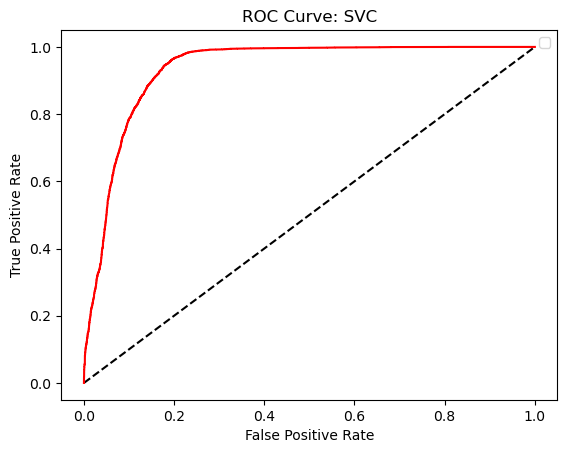

In [16]:
svc= SVC(C=10, gamma=0.1)
svc.fit(X_train, y_train)
pred_y = svc.predict(X_test)
pred_y_prob = svc.decision_function(X_test)
print(confusion_matrix(y_test, pred_y))
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr_svc1, tpr_svc1, thresholds = roc_curve(y_test, pred_y_prob)
auc_score_svc1 = roc_auc_score(y_test, pred_y_prob)

print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc1, tpr_svc1, color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVC')
plt.legend()
plt.show()

# ROC Curve van alle modellen

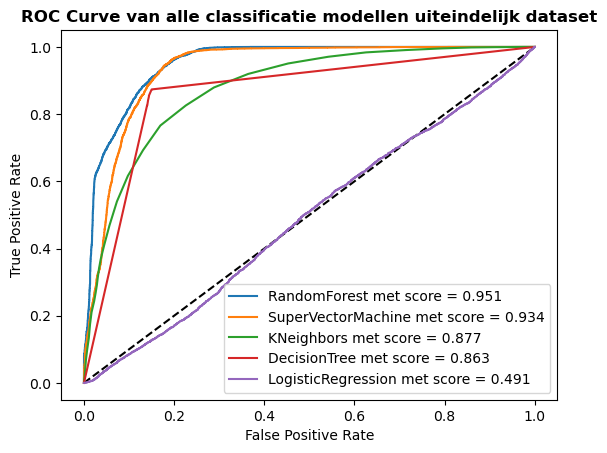

In [17]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc1, tpr_rfc1, label = 'RandomForest met score = %0.3f' % auc_score_rfc1)
plt.plot(fpr_svc1, tpr_svc1, label = 'SuperVectorMachine met score = %0.3f' % auc_score_svc1)
plt.plot(fpr_knn1, tpr_knn1, label = 'KNeighbors met score = %0.3f' % auc_score_knn1)
plt.plot(fpr_clf1, tpr_clf1, label = 'DecisionTree met score = %0.3f' % auc_score_clf1)
plt.plot(fpr_logreg1, tpr_logreg1, label = 'LogisticRegression met score = %0.3f' % auc_score_logreg1)
titel = 'ROC Curve van alle classificatie modellen uiteindelijk dataset'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(titel, fontweight="bold")
plt.legend()
plt.savefig('ROC Curve alle modellen grote dataset.png')
plt.show()


# optuna study om de beste parameters te achterhalen

In [19]:
X_train, X_valid, y_train, y_valid= train_test_split(sim.drop(columns='target'), sim.target, test_size=0.2)
study= optuna.create_study()
def trial(trial):
    depth= trial.suggest_categorical('max_depth', range(1,51))
    n= trial.suggest_categorical('n_estimators', range(1,1001))
    model= RandomForestClassifier(max_depth= depth, n_estimators= n)
    model.fit(X_train, y_train)
    pre_valid= precision_score(y_valid, model.predict(X_valid))
    return pre_valid
study.optimize(trial, n_trials=20)

[I 2023-01-21 16:47:11,276] A new study created in memory with name: no-name-077dd544-71b1-4f30-858a-2c0ff1014dcc
[I 2023-01-21 16:47:54,614] Trial 0 finished with value: 0.8461035564853556 and parameters: {'max_depth': 48, 'n_estimators': 631}. Best is trial 0 with value: 0.8461035564853556.
[I 2023-01-21 16:48:22,975] Trial 1 finished with value: 0.8416376979528776 and parameters: {'max_depth': 15, 'n_estimators': 912}. Best is trial 1 with value: 0.8416376979528776.
[I 2023-01-21 16:48:53,533] Trial 2 finished with value: 0.8446614416034948 and parameters: {'max_depth': 20, 'n_estimators': 789}. Best is trial 1 with value: 0.8416376979528776.
[I 2023-01-21 16:49:13,755] Trial 3 finished with value: 0.838097679784643 and parameters: {'max_depth': 15, 'n_estimators': 662}. Best is trial 3 with value: 0.838097679784643.
[I 2023-01-21 16:49:45,492] Trial 4 finished with value: 0.8469400957433044 and parameters: {'max_depth': 32, 'n_estimators': 559}. Best is trial 3 with value: 0.838097

# verschil tussen de eerste randomforectclassifier en die uit optuna study komt

/opt/jupyterhub/anaconda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/jupyterhub/anaconda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[6590  405]
 [ 133 6872]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      6995
           1       0.94      0.98      0.96      7005

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

accuracy: 0.9615714285714285
precision: 0.944345197196647
recall: 0.9810135617416131


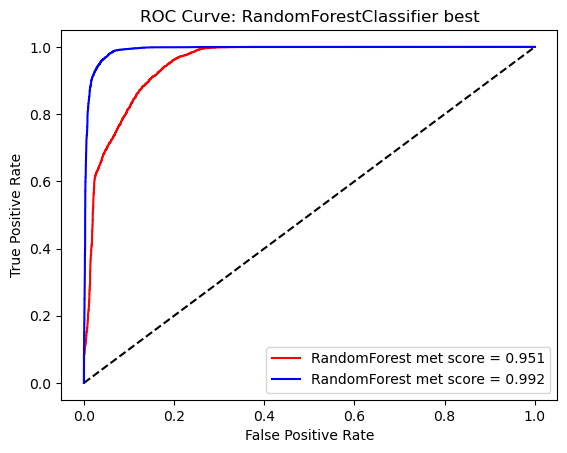

In [21]:
best= RandomForestClassifier(max_depth= 48, n_estimators= 631)
best.fit(X_train, y_train)
pred_y = best.predict(X_test)
pred_y_prob = best.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)
fpr_rfc_best, tpr_rfc_best, thresholds_best = roc_curve(y_test, pred_y_prob)
auc_score_rfc_best = roc_auc_score(y_test, pred_y_prob)

print(f"accuracy: {accuracy}" )
print(f"precision: {precision}" )
print(f"recall: {recall}")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc1, tpr_rfc1, color = 'red', label = 'RandomForest met score = %0.3f' % auc_score_rfc1)
plt.plot(fpr_rfc_best, tpr_rfc_best, color = 'blue', label = 'RandomForest met score = %0.3f' % auc_score_rfc_best)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: RandomForestClassifier best')
plt.legend()
plt.show()

uit al die modellen en figuren blijkt RandomForestClassifier van de optuna study het beste te zijn.